In [1]:
%%capture
# DO NOT EDIT THIS NOTEBOOK
# It generates a report to verify your submission
import logging, sys, os
logging.disable(sys.maxsize)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import solution
import time
start_verify = time.time()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3)

In [2]:
%matplotlib inline
import os
import pickle
import pandas as pd
import numpy as np
import pydot
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import inspect
from IPython.core import page
page.page = print

grades = []

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')
        
def printSource(obj):
    print(''.join(str(x) for x in inspect.getsourcelines(obj)[0]))
        
# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

def print_answer(ans):
    output = ""
    for line in ans.splitlines()[1:]:
        output += line.strip() + " "
    output += "(length: "+str(len(output))+")\n"
    print(output)
        
def run_evaluation(name, model_builder, data, base_dir, target_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, print_model=True, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        grades.append("0")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Model not trained? Skipping.", verbose)
    else: # Load from file
        model = solution.load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
    # Report
    lc = pd.DataFrame(learning_curves)
    print("Max val score: {:.2f}%".format(lc.iloc[:,3].max()*100))
    grades.append("{:.2f}".format(lc.iloc[:,3].max()*100))
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    plt.show()
    
    if print_model:
        print(model.summary())
    plot_model(model, to_file=os.path.join(target_dir,name+'.png'), show_shapes=True, show_layer_names=False)
        
import pprint
pp = pprint.PrettyPrinter(indent=4)

### Web Information Retrieval and Data Mining - Assignment 3

In [3]:
grades.append(solution.target_dir.split(os.sep)[-1])
grades.append(solution.your_name)
print("Student: {0} ({1})".format(solution.your_name,solution.student_id))

Student: Wijnands, Yorick (0872208)


#### Answer 1.1, Baseline (4p)
- Dense network, at least 3 layers, shaped like a pyramid
    - Last layer: 10 nodes, sigmoid. 
    - Loss: categorical cross-entropy. Metric: accuracy
- No preprocessing, regularization. Get at least 70% accuracy.
- Explain design decisions. Discuss performance.
    - Does it overfit (large/growing gap between loss and val_loss)?

We start with a high a amount of nodes and it gives the best result if we half it every time untill it is around the output layer. For the optimizer Adam give a bit better performance than RMSprop. Above 30 epochs the model really starts overfitting and the val_loss only increases, furthermore the val_accuracy doesn't improve much. The validation accuracy gives a pretty good performance. More layers with a lot of nodes gave the best result.  (length: 446)



Max val score: 82.82%


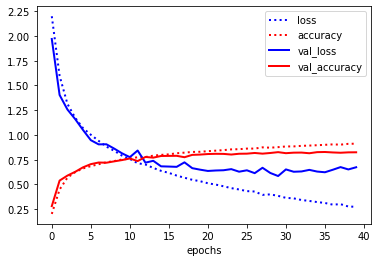

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 32)               

def build_model_1_1():
    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))  
    model.add(layers.Dense(16, activation='relu'))    
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizers.Adam(lr=4e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model



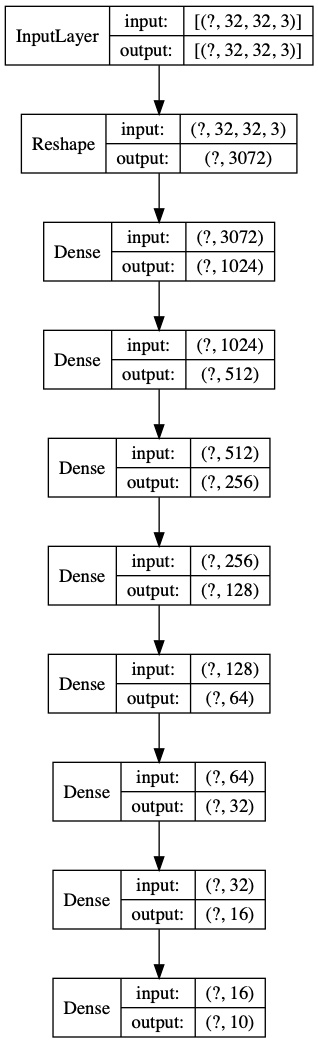

In [4]:
print_answer(solution.answer_q_1_1)
run_evaluation("model_1_1", solution.build_model_1_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_1_1
if os.path.exists(os.path.join(solution.target_dir,'model_1_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_1_1.png'), width=200))

#### Answer 1.2, Preprocess (2p)
- Convert images to greyscale, other preprocessing optional.
    - Input shape should be (32,32,1)
- Explain design decisions. Is it better? Why (not)? 
    - Color information is likely not so useful for classification. Greyscale makes the network smaller, less parameters to learn, less likely to overfit.

For this model the same model is used as in 1.1, however the iamges are replaced with grayscaled versions. The color is probably not important to reconize the numbers and it can avoid some false classification. When looking at the val_acc we can indeed see that it indeed it performce better, altough just a bit.  (length: 314)



Max val score: 83.43%


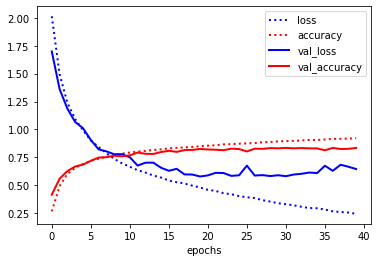

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 32)               

def build_model_1_2():
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))  
    model.add(layers.Dense(16, activation='relu'))    
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizers.Adam(lr=4e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model



In [5]:
print_answer(solution.answer_q_1_2)
run_evaluation("model_1_2", solution.build_model_1_2, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_1_2

#### Answer 1.3, Tune (4p)
- Regularize the model. What works best? 
    - Should consider batch normalization, dropout, l1/l2 regularization (or Nesterov)
- Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
    - At least consider tuning learning rate, ideally also momentum, decay, other optimizers 
- Explain your findings and final design decisions. Discuss the results.
    - Should be better, at least it shouldn't overfit

Regularization decreases the performance of the model. With the kernel regularizer it decreases even more, also a higher dropout decreases it more. The val_loss still decreases, however when having even more epochs it does not decreases much more. The models in 1.1 and 1.2 were not really overfitting and thus regularize the model just makes it worse.  (length: 354)



Max val score: 77.67%


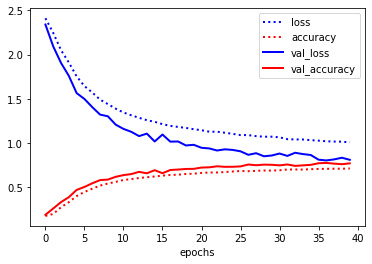

def build_model_1_3():
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    model.add(layers.Dense(1024, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(10, kernel_regularizer=regularizers.l2(0.0001), activation='softmax'))


In [6]:
print_answer(solution.answer_q_1_3)
run_evaluation("model_1_3", solution.build_model_1_3, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False, print_model=False)
%psource solution.build_model_1_3

#### Answer 2.1, ConvNet (7p)
- Build a sequential ConvNet, get at least 90% accuracy.
    - Conv2D layers, input shape (32,32,1)
    - Consider using blocks of Conv2D layers with maxpooling in between
    - Use zero-padding in Conv2D layers because the images are small
    - At least one dense hidden layer and dense output layer (sigmoid)
    - Consider adding batch normalization, dropout
    - Consider small dropout rates in beginning, larger dropout rates later in network
    - Consider other optimizers and tuning learning rate, momentum,...
- Explain what you did and why (800 chars). Is it working well?
    - Should be quite elaborate and sensible

We start with a 32 convalutional layer and increase it to 64 and 128. We add multiple layers such that we can extract more features. We add more filter to try and capture a good amount of patters (for instance edges). MaxPooling is added to make hugely decrease the amount of weights and gives less overfitting, in this model it dramatically decreases computation time and it gives a increase for the performance from the validation accuracy. BatchNormaliztion slitly increases the performance. An dense layer is added after the flatten layer along with a softmax model to the end to classify the image. For the optimizer the same one is used as in 1.1.  (length: 655)



Max val score: 94.26%


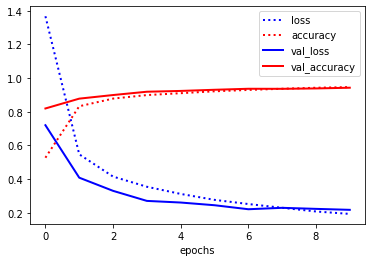

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_102 (Conv2D)          (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_44 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_59 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_45 (Batc (None, 16, 16, 64)      

def build_model_2_1():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                            input_shape=(32, 32, 1)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.1))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.

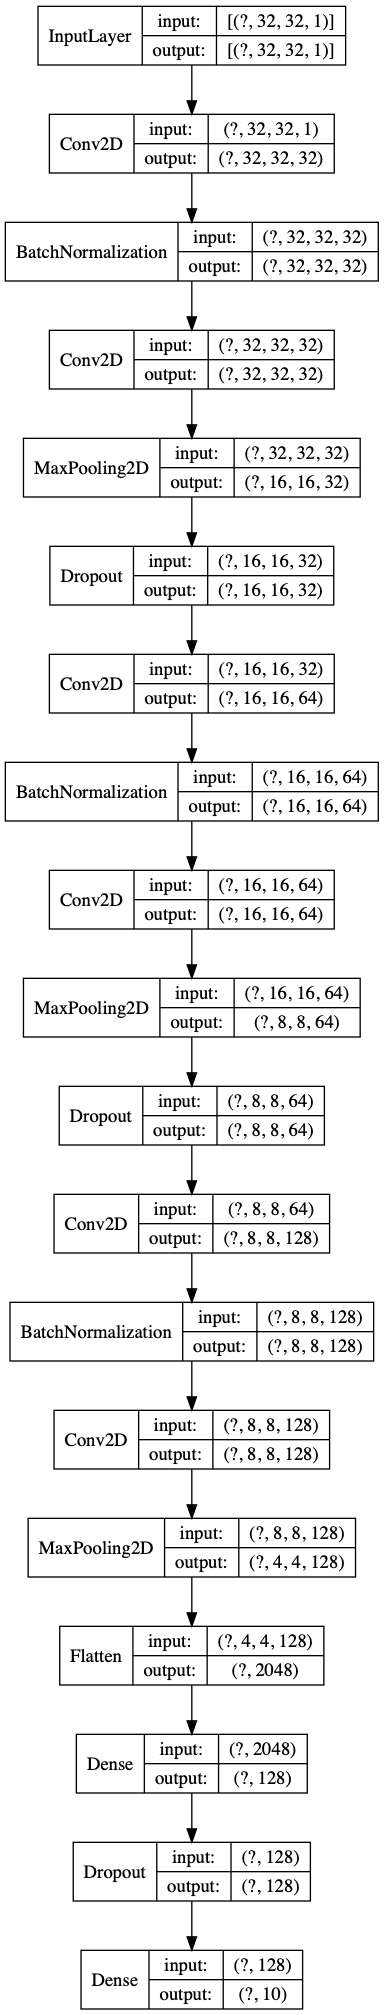

In [7]:
print_answer(solution.answer_q_2_1)
run_evaluation("model_2_1", solution.build_model_2_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_2_1
if os.path.exists(os.path.join(solution.target_dir,'model_2_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_2_1.png'), width=200))

#### Answer 2.2, Data Augmentation (3p)
- Augment the preprocessed training data.
    - Use small variations (small shifts up-down, left-right) of flips becasue the images are small
    - Large shifts and rotations distort the image too much
- Explain what you did and why. Discuss the performance of the model.

Turning the pictures will decrease performance, because for example a six turned looks like a nine. The points in the image we want to fill work the best with the standard mode which looks at the nearest pixel. Bigger changes do not work well, smaller changes work better. When using some smaller changes, there is a little improvement on the validation data, however the training data does not improve.  (length: 405)



Max val score: 94.79%


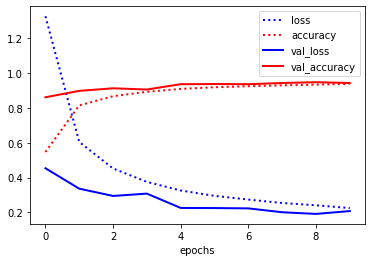


datagen = ImageDataGenerator(width_shift_range=0.1,
                              height_shift_range=0.1,
#                               rotation_range=10,
                              shear_range=0.1,
                              zoom_range=0.1,
                              )


In [8]:
print_answer(solution.answer_q_2_2)
run_evaluation("model_2_2", solution.build_model_2_1, solution.augmented_split, solution.base_dir, 
               solution.target_dir, train=False, print_model=False)
print(solution.dg_code)

#### Answer 3.1, Misclassifications (2p)
- Report the test score (on the held-out test data)
    - Should be similar to score of previous model
- Plot confusion matrix, discuss which classes are often confused.
    - class 1 and 2 are most often confused
- Visualize the misclassifications in more depth by focusing on a single class
- Analyse which kinds of mistakes are made for that class.
    - Should contain some insight (e.g. misclassifications when the numbers are curly or noisy)

 When looking at the images, most images go wrong when there a multiple numbers in the picture. This could be improved by even better augmenting the data and try as well as possible to get single numbers. Furthermore, some of the images are unreadable which make it hard to predict. Thus it mostly goes wrong with unclear images or images with multiple numbers.  (length: 363)

Test score: 0.00%


[59, 77, 996, 1275, 1463, 1609, 1911, 2235, 2272, 2492, 2574, 2830, 2881, 3019, 3410, 3450, 3506, 4000, 4094]


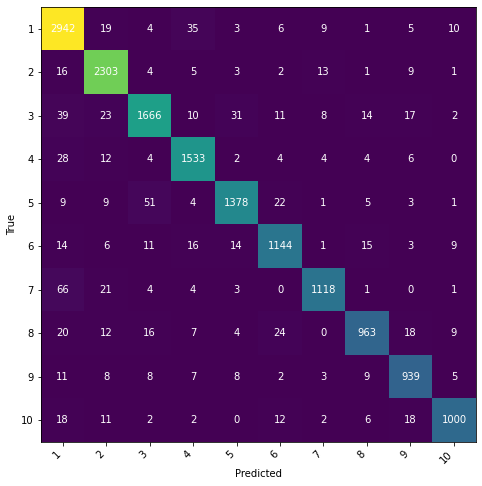

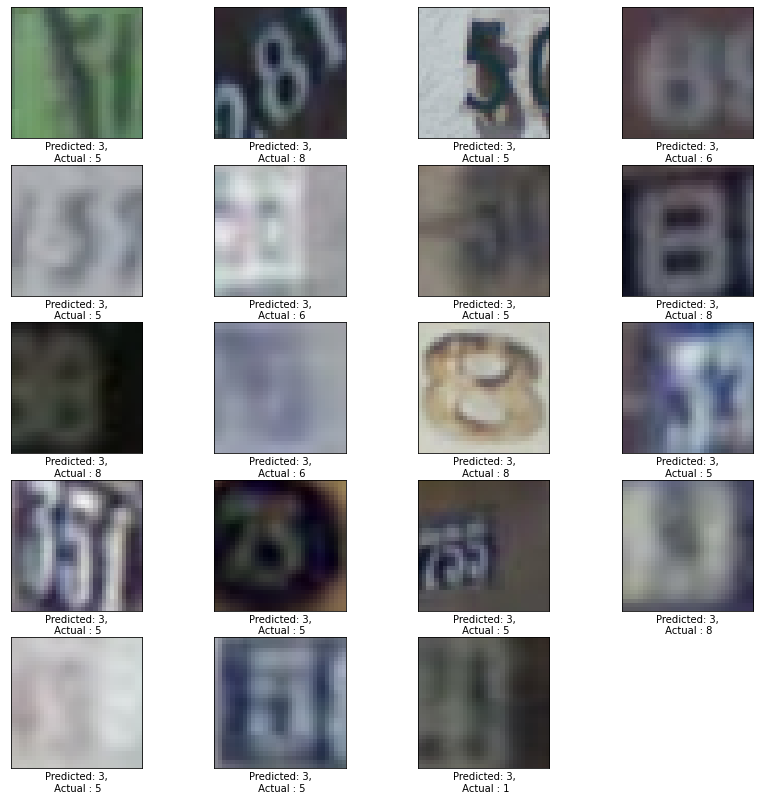

In [9]:
print_answer(solution.answer_q_3_1)
if hasattr(solution, 'test_accuracy_3_1'):
    try:
        print("Test score: {:.2f}%".format(solution.test_accuracy_3_1))
    except TypeError:
        print("Test score:",solution.test_accuracy_3_1)
else:
    print("Test score NOT FOUND: test_accuracy_3_1 missing")
try:
    solution.plot_confusion_matrix()
except:
    print("ERROR, could not build confusion matrix. Please check original report")
try:
    solution.plot_misclassifications()
except:
    print("ERROR, could not build misclassification plot. Please check original report")

#### Answer 3.2, Activations (4p)
- Retrieve and visualize the activations for one example
- For every filter for different convolutional layers (at different depths in the network).
- Give an explanation. Is your model indeed learning something useful?
    - Should detect edges etc in first layers, higher-order object (e.g. interesting regions) in deeper layers.

In the first layer we still see the numbers, however we can see some of the edges being highlighted. In the next layers we see it becoming more abstract. In the last layer we can some highlights which cannot be seen in the training data. Thus it does indeed gets more abstract and it is learning something usefull.  (length: 316)



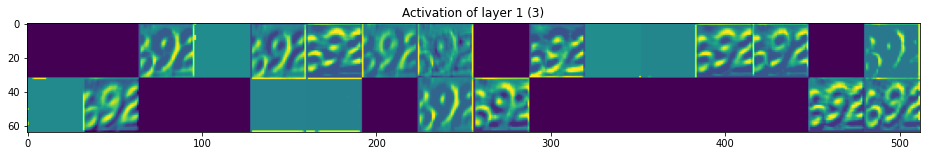

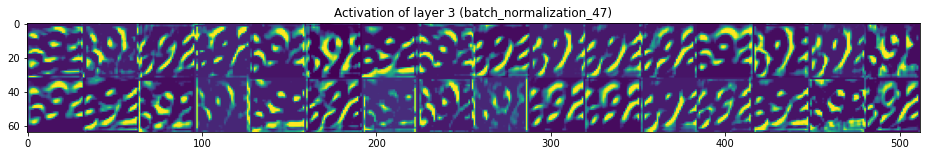

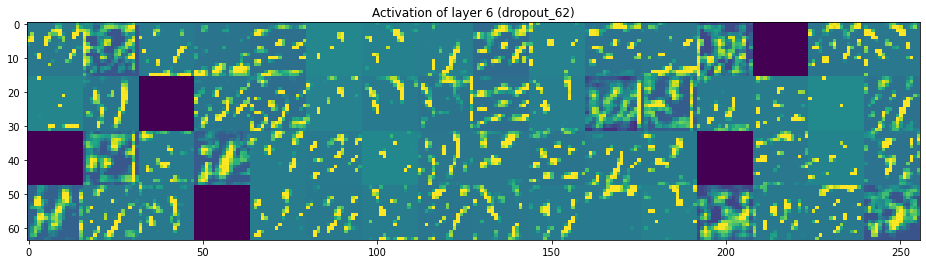

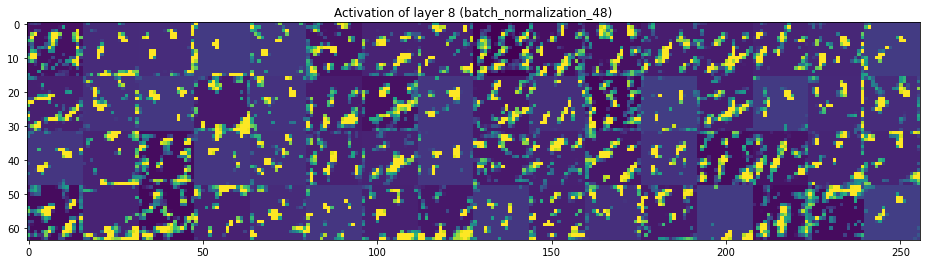

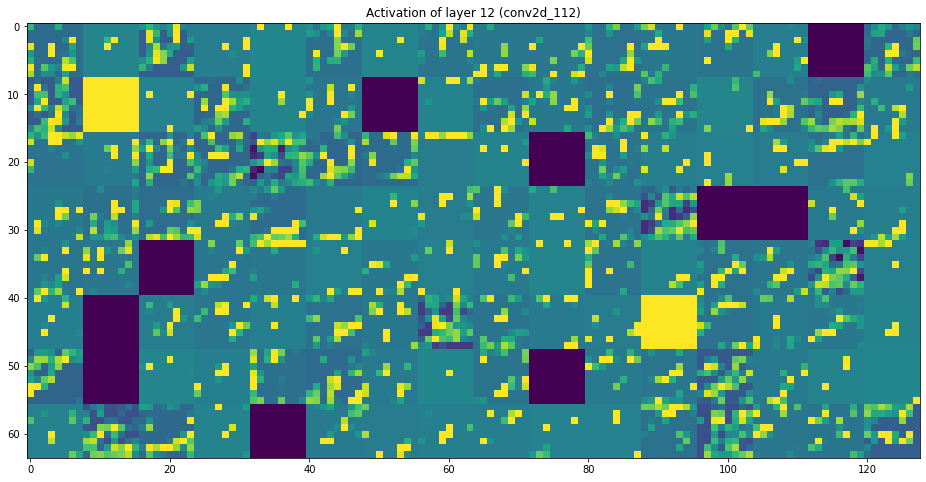

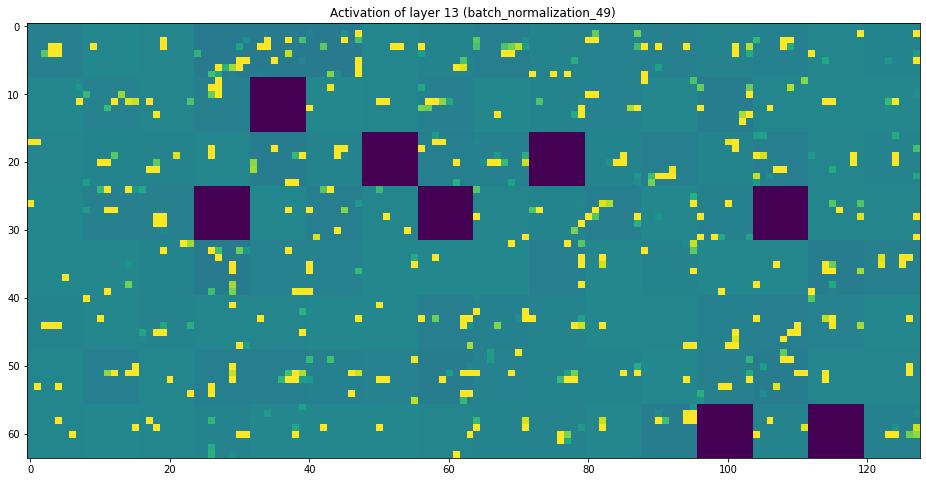

In [10]:
print_answer(solution.answer_q_3_2)
try:
    solution.plot_activations()
except:
    print("ERROR, could not build activation plot. Please check original report")

#### Answer 3.3, Class activation map (4p)
- Show a class activation map for your last convolutional layer
- Superimpose the activation map over the image, or plot side by side
    - Should make sense, detect interesting regions to classify the number

def plot_activation_map():
    
    import matplotlib.gridspec as gridspec

    gs = gridspec.GridSpec(2, 2)
    fig = plt.figure()

    img = X_val_a[1]
    img = np.expand_dims(img, axis=0) 
    activation_3_3 = activation_model.predict(img)
    last_layer_activation = activation_3_3[1]

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, :])
    
    ax1.imshow(X_val[1])
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_xlabel('Input image')
    ax2.matshow(last_layer_activation[0, :, :, 0], cmap='gray')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_xlabel('Activation of the class activation map');
    ax3.imshow(X_val[1], interpolation='none', origin='lower', cmap='gray')
    ax3.imshow(last_layer_activation[0, :, :, 0], interpolation='none', alpha=0.1, cmap='jet')
    ax3.set_xlabel('overlay of both images ')
    ax3.set_xticks([])
    ax3.set_yticks([])



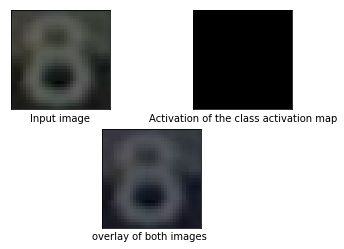

In [11]:
try:
    solution.plot_3_3()
except:
    print("ERROR, could not build class activation plot. Please check original report")
if hasattr(solution, 'plot_activation_map'):
    %psource solution.plot_activation_map
else:
    %psource solution.plot_3_3

#### Answer 4.1, Fast feature extraction (5p)
- Import the VGG16 model, pretrained on ImageNet
- Freeze convolutional base, adds a dense layer
- Consider unfreezing the last few convolutional layers and evaluate whether that works better
    - Check if they do. It is very likely to help.
- Discuss the observed performance
    - Should get around 80% accuracy

When freezing the convolutional base the results are not really good and the improvements stop pretty quickly. When training some of the convolutional base, in this case the last 4 layers. Training some of the last layers gives an improvement. After the base an hidden layer is added and we end with and softmax layer.  (length: 320)



Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

Max val score: 96.77%


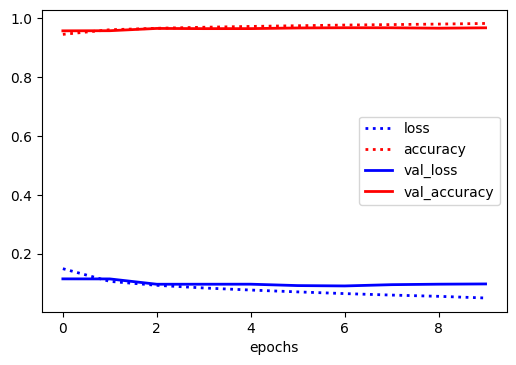

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_21 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_70 (Dense)             (None, 10)                2570      
Total params: 14,848,586
Trainable params: 7,213,322
Non-trainable params: 7,635,264
_________________________________________________________________
None


def build_model_4_1():
    pretrained_model = VGG16(include_top=False, weights='imagenet',input_shape=(32, 32, 3))
    pretrained_model.summary()
    
    #lock all layers
#     for layer in model.layers:
#         layer.trainable = False
    count = 0
    
    #lock last few layers
    for layer in pretrained_model.layers:
        print(count)
        if count < 15:
            layer.trainable = False
            count += 1
        else:
            layer.trainable = True
            
    model = models.Sequential()
    model.add(pretrained_model)
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.summary()
    
    model.compile(optimizer=optimizers.Adam(lr=4e-4),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    
#     for i, layer in enumerate(my_model.layers):
#         print(i, layer.name)

    return model



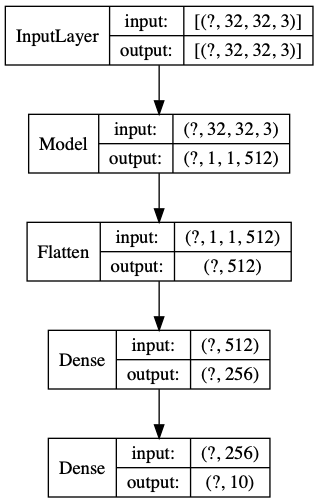

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

print_answer(solution.answer_q_4_1)
run_evaluation("model_4_1", solution.build_model_4_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_4_1
if os.path.exists(os.path.join(solution.target_dir,'model_4_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_4_1.png'), width=200))
#solution.build_model_4_1().layers[0].summary()

#### Answer 4.2, Embeddings (5p)
- Generate embeddings with the trained convolutional part of model_4_1 (without the dense layer)
- Embed the training and test data and store them to disk
- Build and evaluate a pipeline on the embedded data
    - Check if pipeline makes sense (e.g. use models that can handle many dimensions)
- Describe what you did and what you observed (max 800 chars).
    - Consider different models, preprocessing, tuning, etc.
    - Check performance (see original Submission.html) when in doubt. We did not run all the evaluations because it takes too long, and the output is ill-defined.

In [13]:
print_answer(solution.answer_q_4_2)
print(solution.generate_pipeline())
#print("Evaluation:",solution.evaluation_4_2(solution.X_train, solution.y_train, solution.X_test, solution.y_test))
%psource solution.store_embeddings
%psource solution.evaluation_4_2

First the last model is loaded and embeddings from the test and training data are made. For the pipeline we use the random forest classifier and a normalizer. Lastly, we get the score from the pipeline and the embeddings.  (length: 223)

Pipeline(steps=[('scalify', Normalizer()),
                ('clf', RandomForestClassifier(random_state=1))])
def store_embeddings():
    """ Stores all necessary embeddings to file
    """
    
    embed_model = load_model_from_file(base_dir, 'model_4_1', extension='.h5')
    model = embed_model.layers[0]
    model.compile(optimizer=optimizers.Adam(lr=4e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

    embedding = model.predict(X_test)
    store_embedding(embedding, 'X_test')
    
    embedding = model.predict(X_train)
    store_embedding(embedding, 'X_train')

def evaluation_4_2(X_train, y_train, X_test, y_test):
    """ Runs 'evaluate_pipeline' with embedded versions of the input data 
    and returns the accurac

In [14]:
end_verify = time.time()
print("Running time: {:.2f} seconds".format(end_verify - start_verify))
print("Last modified: {}".format(solution.last_edit))
print("scikit-learn version: {0}".format(solution.sklearn_version))

with open(solution.grade_file, "a") as myfile:
    myfile.write(','.join(grades)+"\n")

Running time: 41.49 seconds
Last modified: May 26, 2020
scikit-learn version: 0.23.1
